In [1]:
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.layers import Embedding
from keras.layers import Conv1D, GlobalMaxPooling1D
from keras.datasets import imdb

Using TensorFlow backend.


In [2]:
import numpy as np
# save np.load
np_load_old = np.load

# modify the default parameters of np.load
np.load = lambda *a,**k: np_load_old(*a, allow_pickle=True, **k)

# call load_data with allow_pickle implicitly set to true
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=20000)

# restore np.load for future normal usage
np.load = np_load_old

17465344/17464789 [==============================] - 0s 0us/step


In [3]:
# 훈련셋과 검증셋 분리
x_val = x_train[20000:]
y_val = y_train[20000:]
x_train = x_train[:20000]
y_train = y_train[:20000]

print('x_train shape:', x_train.shape)

x_train shape: (20000,)


In [0]:
# 데이터셋 전처리
x_train = sequence.pad_sequences(x_train, maxlen=200)
x_val = sequence.pad_sequences(x_val, maxlen=200)
x_test = sequence.pad_sequences(x_test, maxlen=200)

In [5]:
# 모델 구성
model = Sequential()
model.add(Embedding(20000, 128))
model.add(Conv1D(256, # filters
                 3, # kernel_size
                 padding='valid',
                 activation='relu',
                 strides=1))
model.add(GlobalMaxPooling1D())
model.add(Dense(128, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

W0804 08:06:50.827226 140403622582144 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0804 08:06:50.871335 140403622582144 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0804 08:06:50.877926 140403622582144 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.



In [6]:
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, None, 128)         2560000   
_________________________________________________________________
conv1d_1 (Conv1D)            (None, None, 256)         98560     
_________________________________________________________________
global_max_pooling1d_1 (Glob (None, 256)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 129       
Total params: 2,691,585
Trainable params: 2,691,585
Non-trainable params: 0
_________________________________________________________________
None


In [7]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy']) # 모델 학습과정 설정

hist = model.fit(x_train, y_train, epochs=25, batch_size=64, validation_data=(x_val, y_val))
# 모델 학습시키기

scores = model.evaluate(x_train, y_train, verbose=0) # 테스트 데이터에 대해서 정확도 평가
print("정확도: %.2f%%" % (scores[1]*100))

W0804 08:06:51.003930 140403622582144 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0804 08:06:51.033525 140403622582144 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:3376: The name tf.log is deprecated. Please use tf.math.log instead.

W0804 08:06:51.041494 140403622582144 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/nn_impl.py:180: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
W0804 08:06:51.307405 140403622582144 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:986: The name tf.assign_add is deprecated. P

Train on 20000 samples, validate on 5000 samples
Epoch 1/25
20000/20000 [==============================] - 73s 4ms/step - loss: 0.4254 - acc: 0.7855 - val_loss: 0.2745 - val_acc: 0.8854
Epoch 2/25
20000/20000 [==============================] - 72s 4ms/step - loss: 0.1756 - acc: 0.9357 - val_loss: 0.2550 - val_acc: 0.8934
Epoch 3/25
20000/20000 [==============================] - 72s 4ms/step - loss: 0.0397 - acc: 0.9892 - val_loss: 0.3159 - val_acc: 0.8940
Epoch 4/25
20000/20000 [==============================] - 72s 4ms/step - loss: 0.0055 - acc: 0.9996 - val_loss: 0.3462 - val_acc: 0.8952
Epoch 5/25
20000/20000 [==============================] - 72s 4ms/step - loss: 8.9399e-04 - acc: 1.0000 - val_loss: 0.3719 - val_acc: 0.8978
Epoch 6/25
20000/20000 [==============================] - 72s 4ms/step - loss: 4.0337e-04 - acc: 1.0000 - val_loss: 0.3910 - val_acc: 0.8968
Epoch 7/25
20000/20000 [==============================] - 72s 4ms/step - loss: 2.5286e-04 - acc: 1.0000 - val_loss: 0.405

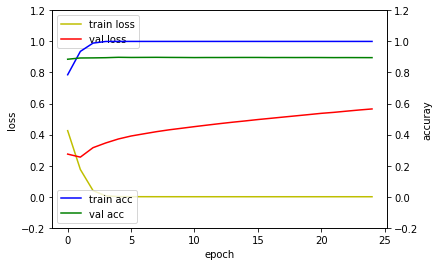

In [8]:
# 학습과정
%matplotlib inline
import matplotlib.pyplot as plt

fig, loss_ax = plt.subplots()

acc_ax = loss_ax.twinx()

loss_ax.plot(hist.history['loss'], 'y', label='train loss')
loss_ax.plot(hist.history['val_loss'], 'r', label='val loss')
loss_ax.set_ylim([-0.2, 1.2])

acc_ax.plot(hist.history['acc'], 'b', label='train acc')
acc_ax.plot(hist.history['val_acc'], 'g', label='val acc')
acc_ax.set_ylim([-0.2, 1.2])

loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax.set_ylabel('accuray')

loss_ax.legend(loc='upper left')
acc_ax.legend(loc='lower left')

plt.show()

In [9]:
# 모델 평가
loss_and_metrics = model.evaluate(x_test, y_test, batch_size=64)
print('## evaluation loss and_metrics ##')
print(loss_and_metrics)

25000/25000 [==============================] - 22s 863us/step
## evaluation loss and_metrics ##
[0.5942585745334625, 0.884120000038147]
